In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# playerID       Player ID code
# yearID         Year
# stint          player's stint (order of appearances within a season)
# teamID         Team
# lgID           League
# G              Games
# AB             At Bats
# R              Runs
# H              Hits
# 2B             Doubles
# 3B             Triples
# HR             Homeruns
# RBI            Runs Batted In
# SB             Stolen Bases
# CS             Caught Stealing
# BB             Base on Balls
# SO             Strikeouts
# IBB            Intentional walks
# HBP            Hit by pitch
# SH             Sacrifice hits
# SF             Sacrifice flies
# GIDP           Grounded into double plays

In [4]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)

In [5]:
juiced = pd.read_csv("juiced.csv")
steroids = pd.read_csv("steroids.csv")

In [6]:
def remove_unnamed(df):
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    return df

In [7]:
juiced

,Unnamed: 0,playerID,yearID,stint,teamID,lgID,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,98429,abreubo01,2014,1,NYN,NL,78,133,12,33,...,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
1,98430,abreujo02,2014,1,CHA,AL,145,556,80,176,...,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0
2,98434,ackledu01,2014,1,SEA,AL,143,502,64,123,...,65.0,8.0,4.0,32,90.0,1.0,3.0,3.0,2.0,10.0
3,98438,adamsma01,2014,1,SLN,NL,142,527,55,152,...,68.0,3.0,2.0,26,114.0,5.0,3.0,0.0,7.0,9.0
4,98441,adducji02,2014,1,TEX,AL,44,101,13,17,...,8.0,3.0,1.0,10,27.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,105849,younger03,2018,1,LAA,AL,41,109,12,22,...,8.0,5.0,1.0,6,28.0,0.0,1.0,0.0,1.0,4.0
2203,105856,zimmebr01,2018,1,CLE,AL,34,106,14,24,...,9.0,4.0,1.0,7,44.0,0.0,1.0,0.0,0.0,1.0
2204,105858,zimmery01,2018,1,WAS,NL,85,288,33,76,...,51.0,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0
2205,105859,zobribe01,2018,1,CHN,NL,139,455,67,139,...,58.0,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0


In [8]:
steroids = remove_unnamed(steroids)
steroids.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abnersh01,1990,1,SDN,NL,91,184,17,45,9,...,15.0,2.0,3.0,9,28.0,1.0,2.0,2.0,1.0,3.0
1,aldremi01,1990,1,MON,NL,96,161,22,39,7,...,18.0,1.0,2.0,37,31.0,2.0,1.0,0.0,1.0,2.0
2,alomaro01,1990,1,SDN,NL,147,586,80,168,27,...,60.0,24.0,7.0,48,72.0,1.0,2.0,5.0,5.0,16.0
3,alomasa02,1990,1,CLE,AL,132,445,60,129,26,...,66.0,4.0,1.0,25,46.0,2.0,2.0,5.0,6.0,10.0
4,anderbr01,1990,1,BAL,AL,89,234,24,54,5,...,24.0,15.0,2.0,31,46.0,2.0,5.0,4.0,5.0,4.0


In [9]:
juiced = remove_unnamed(juiced)
juiced.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abreubo01,2014,1,NYN,NL,78,133,12,33,9,...,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
1,abreujo02,2014,1,CHA,AL,145,556,80,176,35,...,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0
2,ackledu01,2014,1,SEA,AL,143,502,64,123,27,...,65.0,8.0,4.0,32,90.0,1.0,3.0,3.0,2.0,10.0
3,adamsma01,2014,1,SLN,NL,142,527,55,152,34,...,68.0,3.0,2.0,26,114.0,5.0,3.0,0.0,7.0,9.0
4,adducji02,2014,1,TEX,AL,44,101,13,17,3,...,8.0,3.0,1.0,10,27.0,0.0,0.0,1.0,2.0,2.0


In [10]:
print("Steroid Mean: {} \nSteroid StDev: {} \n\nJuice Mean: {} \nJuice StDev: {}".format(steroids.HR.mean(), 
                                                                                     juiced.HR.mean(),
                                                                                     steroids.HR.std(), 
                                                                                     juiced.HR.std()))

Steroid Mean: 10.395577820003455 
Steroid StDev: 11.461712732215677 

Juice Mean: 10.122573994956918 
Juice StDev: 9.532654065338109


In [11]:
t_stat, p_value = stats.ttest_ind(steroids['H'], juiced['H'], equal_var=False)

In [12]:
t_stat, p_value

(2.4493457342387512, 0.014352816461711874)

In [13]:
def t_stat_p_val_1(col_name):
    t_stat, p_value = stats.ttest_ind(steroids[col_name], juiced[col_name], equal_var=False)
    print('T-Stat: {} \nP-Value: {}'.format(t_stat, p_value))

In [14]:
def t_stat_p_val_2(col_name):
    t_stat, p_value = stats.ttest_ind(juiced[col_name], steroids[col_name], equal_var=False)
    print('T-Stat: {} \nP-Value: {}'.format(t_stat, p_value))

In [15]:
t_stat_p_val_1('H') #hits

T-Stat: 2.4493457342387512 
P-Value: 0.014352816461711874


In [16]:
t_stat_p_val_1('2B') #doubles

T-Stat: -0.023326832269210052 
P-Value: 0.9813907017728931


In [17]:
t_stat_p_val_1('HR') #home runs 

T-Stat: -4.393886471217105 
P-Value: 1.1407979205065639e-05


In [18]:
t_stat_p_val_1('SO') #strike outs 

T-Stat: -20.137596547351038 
P-Value: 2.4730525003046932e-85


In [19]:
#critical value 
deg = len(steroids) + len(juiced) - 2
crit_val = np.round(stats.t.ppf(1-0.05, df=deg), 5)
crit_val

1.64504

### *Ho*: Steroid Era players were better hitters

### *Ha*: Steroid Era players were not better hitters  

In [20]:
colname = 'H'
print("Steroid Mean: {} \nSteroid StDev: {} \nJuice Mean: {} \nJuice StDev: {}".format(steroids[colname].mean(), 
                                                                                     juiced[colname].mean(),
                                                                                     steroids[colname].std(), 
                                                                                     juiced[colname].std()))

Steroid Mean: 91.83036793919503 
Steroid StDev: 88.87902129587675 
Juice Mean: 49.55414799492732 
Juice StDev: 47.62552578782344


In [21]:
#Hit to At Bat ratio (batting avg)
juiced['AVG'] = juiced['H'] / juiced['AB']
steroids['AVG'] = steroids['H'] / steroids['AB'] 

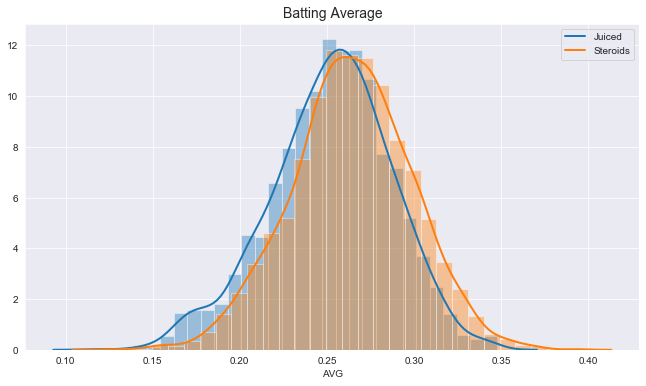

In [22]:
plt.figure(figsize=(11,6))
sns.distplot(juiced['AVG'], bins=30,kde_kws={"lw": 2, "label": "Juiced"})
sns.distplot(steroids['AVG'], bins=30,kde_kws={"lw": 2, "label": "Steroids"})
plt.title("Batting Average", fontsize=14);

In [23]:
t_stat_p_val_1('AVG')

T-Stat: 13.70934931371592 
P-Value: 7.8742099225483e-42


In [24]:
colname = 'H'
t_stat, p_value = stats.ttest_ind(steroids[colname], juiced[colname], equal_var=False)
t_stat, p_value

(2.4493457342387512, 0.014352816461711874)

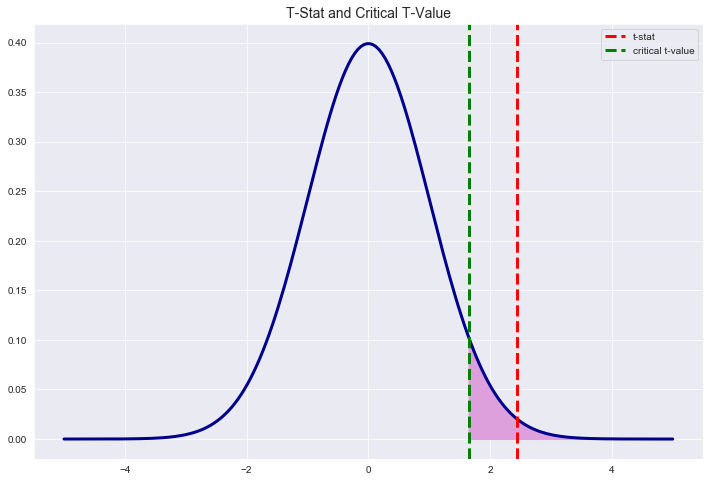

In [25]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(crit_val,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,crit_val,where = xs > crit_val, color = 'plum')
plt.title('T-Stat and Critical T-Value', fontsize=14)
ax.legend()
plt.show()

### *Ho*: National League players have better batting averages

### *Ha*: American League players have better batting averages

In [26]:
NLSter = steroids[steroids['lgID']=='NL']
ALSter = steroids[steroids['lgID']=='AL']

NLJuice = juiced[juiced['lgID']=='NL']
ALJuice = juiced[juiced['lgID']=='AL']

In [27]:
NL = pd.concat([NLSter, NLJuice], ignore_index=True)
AL = pd.concat([ALSter, ALJuice], ignore_index=True)

In [28]:
print("NL Mean: {} \nNL StDev: {} \nAL Mean {} \nAL StDev: {}".format(NL.AVG.mean(),
                                                                  NL.AVG.std(),
                                                                  AL.AVG.mean(), 
                                                                  AL.AVG.std()))

NL Mean: 0.26161966136046516 
NL StDev: 0.03573001555296526 
AL Mean 0.2600010153517902 
AL StDev: 0.03508127199382807


In [29]:
#critical value 
league_deg = len(AL) + len(NL) - 2
league_crit_val = np.round(stats.t.ppf(1-0.05, df=league_deg), 5)
league_crit_val

1.64504

In [30]:
colname = 'AVG'
t_stat_2, p_value_2 = stats.ttest_ind(NL[colname], AL[colname], equal_var=False)
t_stat_2, p_value_2

(2.043912227022809, 0.0409949361619532)

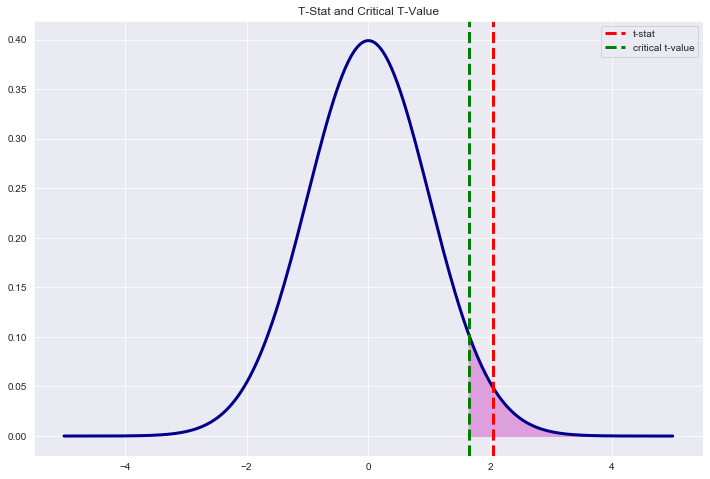

In [31]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat_2, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(league_crit_val,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,league_crit_val,where = xs > league_crit_val, color = 'plum')
plt.title('T-Stat and Critical T-Value')
ax.legend()
plt.show()

### Home runs and stike outs?

In [32]:
print('Steroid Strikeout Mean: {}\nSteroid Stikeout StDev: {}\n'.format(steroids.SO.mean(), 
                                                                           steroids.SO.std()))

print('Juiced Strikeout Mean: {}\nJuied Stikeout StDev: {}'.format(juiced.SO.mean(), 
                                                                           juiced.SO.std()))

Steroid Strikeout Mean: 58.79979271031266
Steroid Stikeout StDev: 32.43454138310608

Juiced Strikeout Mean: 77.61169007702765
Juied Stikeout StDev: 39.05019329957749


In [33]:
#Bonds strikeout Z-score
(93 - steroids.SO.mean())/steroids.SO.std()

1.0544378255800135

In [34]:
#Stantons strikeout Z-score
(163 - juiced.SO.mean())/juiced.SO.std()

2.1866296350419407

In [35]:
steroids.loc[steroids['HR'].idxmax()] #Barry Bonds

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI               137
SB                 13
CS                  3
BB                177
SO                 93
IBB                35
HBP                 9
SH                  0
SF                  2
GIDP                5
AVG          0.327731
Name: 4506, dtype: object

In [36]:
 juiced.loc[juiced['HR'].idxmax()] #Mike (Giancarlo) Stanton

playerID    stantmi03
yearID           2017
stint               1
teamID            MIA
lgID               NL
G                 159
AB                597
R                 123
H                 168
2B                 32
3B                  0
HR                 59
RBI               132
SB                  2
CS                  2
BB                 85
SO                163
IBB                13
HBP                 7
SH                  0
SF                  3
GIDP               13
AVG          0.281407
Name: 1704, dtype: object

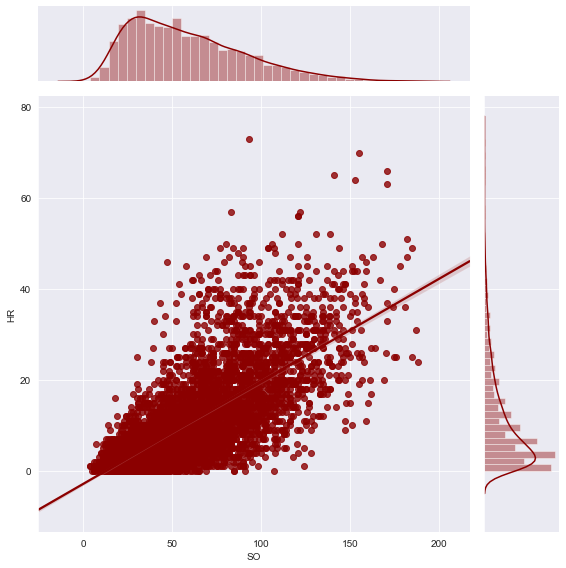

In [37]:
sns.jointplot(x='SO', y='HR', data=steroids, kind='reg', height=8, color='darkred');

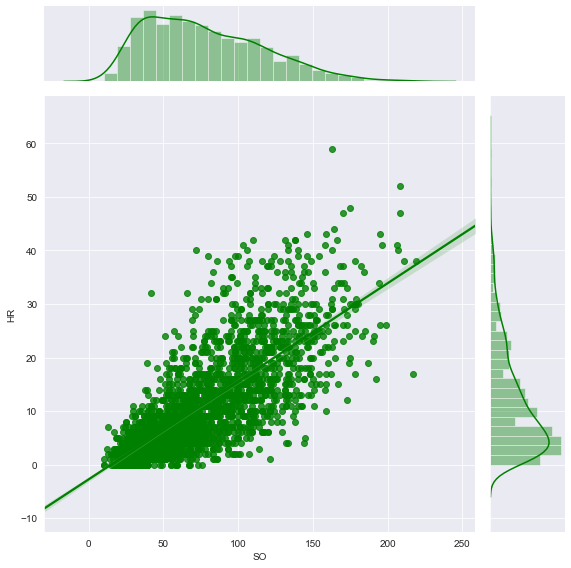

In [38]:
sns.jointplot(x='SO', y='HR', data=juiced, kind='reg', height=8, color='green');

In [39]:
#critical value 
deg = len(steroids) + len(juiced) - 2
crit_val = np.round(stats.t.ppf(1-0.05, df=deg), 5)
crit_val

1.64504

In [40]:
colname = '2B'
t_stat_3, p_value_3 = stats.ttest_ind(steroids[colname], juiced[colname])
t_stat_3, p_value_3

(-0.02299052460481848, 0.9816584050390822)

In [41]:
juiced['SOHR']  = juiced['HR']/juiced['SO']

In [42]:
steroids['SOHR'] = steroids['HR']/steroids['SO']

In [53]:
steroids.groupby('yearID').mean()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG,SOHR
yearID,,,,,,,,,,,,,,,,,,,,
1990,1.050398,108.854111,346.023873,44.381963,91.432361,16.230769,2.159151,8.432361,41.978780,8.307692,3.803714,34.371353,54.941645,3.522546,2.082228,2.633952,3.132626,7.527851,0.257764,0.138238
1991,1.038760,107.909561,340.113695,44.374677,89.077519,15.922481,2.204134,8.493540,41.865633,7.713178,3.860465,34.007752,55.317829,3.067183,2.217054,2.816537,3.067183,7.276486,0.253041,0.135841
1992,1.038860,105.984456,339.790155,42.235751,88.917098,16.093264,2.077720,7.562176,39.994819,8.111399,3.891192,33.556995,53.329016,3.305699,2.396373,2.823834,3.168394,7.507772,0.254329,0.126498
1993,1.032746,108.526448,355.221662,49.224181,96.534005,17.594458,2.244332,9.637280,46.342569,7.904282,3.957179,35.672544,57.151134,3.607053,2.838791,2.710327,3.370277,7.987406,0.264755,0.159790
1994,1.019663,83.679775,280.238764,41.261236,77.356742,14.929775,1.814607,8.814607,39.042135,6.098315,2.727528,29.230337,47.896067,2.741573,2.278090,1.980337,2.595506,6.247191,0.270519,0.173512
1995,1.045685,96.837563,316.690355,46.121827,86.875635,16.416244,1.944162,9.852792,43.626904,7.111675,2.997462,33.324873,55.129442,2.690355,2.865482,2.157360,2.743655,7.312183,0.268081,0.165916
1996,1.063107,105.174757,345.798544,51.813107,95.713592,18.097087,1.961165,11.514563,49.089806,7.458738,3.016990,36.446602,61.555825,3.160194,3.140777,2.126214,3.165049,8.133495,0.267986,0.168783
1997,1.063830,103.780142,337.080378,48.085106,92.033097,17.900709,1.952719,10.524823,45.650118,7.491726,3.543735,34.926714,61.862884,2.680851,3.219858,2.245863,3.099291,7.598109,0.266699,0.156890
1998,1.077098,106.544218,347.410431,49.614512,94.750567,18.628118,1.920635,11.052154,47.385488,7.099773,3.229025,35.070295,63.086168,2.371882,3.390023,2.235828,3.036281,7.791383,0.265069,0.159394


In [44]:
juiced.groupby('yearID').sum()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG,SOHR
yearID,,,,,,,,,,,,,,,,,,,,
2014,462,45453,150845,18493,38901,7643,799,3988,17605.0,2626.0,981.0,13140,32721.0,951.0,1526.0,694.0,1197.0,3312.0,110.535948,49.155459
2015,471,45428,150390,19282,39298,7733,888,4680,18506.0,2351.0,994.0,13088,32555.0,906.0,1482.0,614.0,1167.0,3464.0,111.969929,59.466336
2016,452,45838,151836,20476,39696,7788,821,5412,19613.0,2421.0,937.0,14204,34443.0,911.0,1548.0,495.0,1144.0,3446.0,110.842242,63.141660
2017,461,45663,151637,21276,39684,7953,738,5873,20379.0,2413.0,877.0,14855,35293.0,935.0,1654.0,387.0,1095.0,3532.0,111.693244,68.381794
2018,478,46018,151755,20375,38577,7804,802,5343,19466.0,2355.0,912.0,14740,36277.0,913.0,1812.0,376.0,1152.0,3190.0,111.349688,62.499037


In [45]:
df_2001 = steroids[steroids['yearID'] == 2001]

In [46]:
df_2017 = juiced[juiced['yearID'] == 2017]

In [47]:
#critical value 
deg = len(df_2001) + len(df_2017) - 2
crit_val = np.round(stats.t.ppf(1-0.05, df=deg), 5)
crit_val, -crit_val

(1.6466, -1.6466)

In [48]:
colname = 'HR'
t_stat_4, p_value_4 = stats.ttest_ind(df_2001[colname], df_2017[colname])
t_stat_4, p_value_4

(-1.9730623998376982, 0.04880390532524338)

In [49]:
#if p-value is lower than alpha(0.05) reject the null hypothesis 




# if pval < 0.05:    # alpha value is 0.05 or 5%
#     print(" we are rejecting null hypothesis")
# else:
#     print("we are accepting null hypothesis")

In [56]:
from statsmodels.stats import weightstats as stests


#Z-Test

# ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
# print(float(pval))



# ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')
# print(float(pval1))
# if pval<0.05:
#     print("reject null hypothesis")
# else:
#     print("accept null hypothesis")







#F-Test (ANOVA) One-Way

# df_anova = pd.read_csv('PlantGrowth.csv')
# df_anova = df_anova[['weight','group']]
# grps = pd.unique(df_anova.group.values)
# d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
# F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
# print("p-value for significance is: ", p)
# if p<0.05:
#     print("reject null hypothesis")
# else:
#     print("accept null hypothesis")






#F-Test (ANOVA) Two-Way

# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
# model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()

# print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, 
#                                                                            p = {model.f_pvalue: .4f}")

# res = sm.stats.anova_lm(model, typ= 2)
# res










In [58]:
from scipy.stats import pearsonr
data1, data2 = juiced['HR'], juiced['SO']
corr, p = pearsonr(data1, data2)
corr, p

(0.7506073889393456, 0.0)

In [63]:
from scipy.stats import mannwhitneyu
data1, data2 = juiced['HR'], steroids['HR']
stat, p = mannwhitneyu(data1, data2)
stat, p

(5741079.5, 1.0989564502425996e-12)

In [66]:
from scipy.stats import f_oneway
data1, data2 = juiced['AVG'], steroids['AVG']
stat, p = f_oneway(data1, data2)
stat, p

(188.5736507645886, 1.9689602947076818e-42)